In [1]:
import numpy as np
import timeit
import random
from distances import *
from nearest_neighbors import *
from cross_validation import *

In [61]:
from sklearn import datasets
X_mn, y_mn = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [65]:
X_train, y_train = X_mn[:60000], y_mn[:60000]
X_test, y_test = X_mn[60000:], y_mn[60000:]
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
strategy = ['my_own', 'brute', 'kd_tree', 'ball_tree']
sizes = [10, 20, 100]
k = 5
for size in sizes:
    idx = np.unique(np.random.randint(X_train.shape[1], size=size))
    for strat in strategy:
        cl = KNNClassifier(k=k, strategy=strat, metric='euclidean', weights=False, test_block_size=200)
        cl.fit(X_train[..., idx], y_train[..., idx])
        start_time = timeit.default_timer()
        cl.find_kneighbors(X_test[..., idx], return_distance=False)
        time = timeit.default_timer() - start_time
        print(f'size features = {size}; strategy = {strat}; time = {time}')

size features = 10; strategy = my_own; time = 65.74481245900006
size features = 10; strategy = brute; time = 11.01459619000002
size features = 10; strategy = kd_tree; time = 1.6003130280000732
size features = 10; strategy = ball_tree; time = 2.147780874000091
size features = 20; strategy = my_own; time = 66.847140438
size features = 20; strategy = brute; time = 10.961105515999861
size features = 20; strategy = kd_tree; time = 6.688742156999979
size features = 20; strategy = ball_tree; time = 28.085191028999816
size features = 100; strategy = my_own; time = 69.85947947300019
size features = 100; strategy = brute; time = 14.13291736899987
size features = 100; strategy = kd_tree; time = 132.39915086399992
size features = 100; strategy = ball_tree; time = 114.4766665029997


In [66]:
cv = kfold(X_train.shape[0], 3)
k_list = np.arange(1, 11)
metrics = ['euclidean', 'cosine']
weights = [True, False]
for w in weights:
    for m in metrics:
        start_time = timeit.default_timer()
        res = knn_cross_val_score(X_train, y_train, k_list, 'accuracy', cv = cv, strategy='brute', metric=m, weights=w)
        time = timeit.default_timer() - start_time
        print(f'metric: {m}; weights = {w}; time = {time}')
        print(res)
        print('Mean values for cross-val')
        for k in k_list:
            print(k, np.mean(res[k]))

metric: euclidean; weights = True; time = 168.1370780060006
{1: array([0.96895, 0.96675, 0.9667 ]), 2: array([0.96895, 0.96675, 0.9667 ]), 3: array([0.97075, 0.9691 , 0.96825]), 4: array([0.9713, 0.9698, 0.9701]), 5: array([0.96925, 0.96825, 0.96875]), 6: array([0.9704 , 0.96845, 0.96945]), 7: array([0.96735, 0.96595, 0.967  ]), 8: array([0.9676 , 0.96665, 0.9678 ]), 9: array([0.9651, 0.9643, 0.9657]), 10: array([0.9647 , 0.96465, 0.9657 ])}
Mean values for cross-val
1 0.9674666666666667
2 0.9674666666666667
3 0.9693666666666667
4 0.9704
5 0.96875
6 0.9694333333333334
7 0.9667666666666667
8 0.96735
9 0.9650333333333334
10 0.9650166666666666
metric: cosine; weights = True; time = 160.785360165999
{1: array([0.9733 , 0.9708 , 0.97045]), 2: array([0.9733 , 0.9708 , 0.97045]), 3: array([0.97495, 0.9725 , 0.97175]), 4: array([0.97545, 0.9732 , 0.97365]), 5: array([0.974  , 0.97095, 0.973  ]), 6: array([0.97465, 0.9714 , 0.97305]), 7: array([0.9726 , 0.9693 , 0.97195]), 8: array([0.97295, 0.

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
def build_conf_mat(y_pred, y_test):
    matrix = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(matrix, cmap=plt.cm.Blues)
    
    ax.set(xticks=np.arange(matrix.shape[1]),
          yticks=np.arange(matrix.shape[0]),
          xticklabels=np.arange(0, 10), yticklabels=np.arange(0, 10),
          title='Матрица ошибок',
          ylabel='Истинный класс',
          xlabel='Предсказанный класс')

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, matrix[i, j], ha="center", va="center")
    fig.tight_layout()
    return ax

In [68]:
cl = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
cl.fit(X_train, y_train)
y_pred = cl.predict(X_test)
np.count_nonzero(y_pred == y_test) / len(y_test)

0.9752

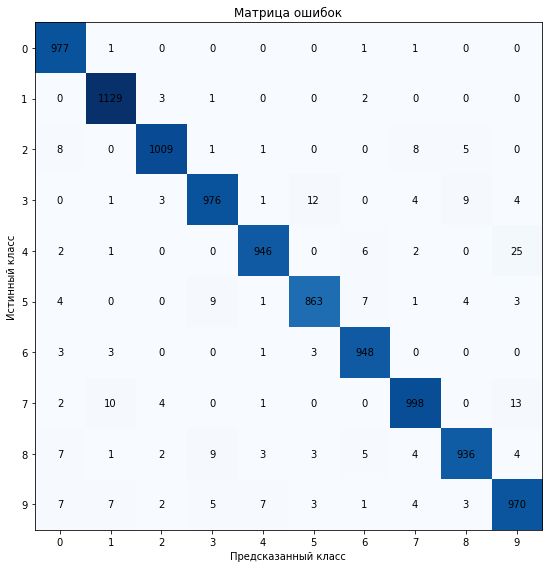

In [69]:
build_conf_mat(y_pred, y_test)

In [70]:
print(np.nonzero((y_test == 9) & (y_pred == 0)))
#np.nonzero(y_test == 0)

(array([2648, 2939, 4163, 6081, 6157, 6172, 6505]),)


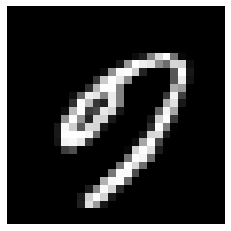

In [80]:
plt.subplot(1, 1, 1)
img = X_test[4163].reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

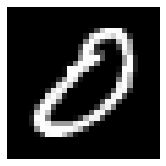

In [72]:
plt.subplot(1, 2, 2)
img = X_test[9964].reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [73]:
print(np.nonzero((y_test == 8) & (y_pred == 3)))

(array([ 591,  839, 1319, 1878, 4075, 4145, 4890, 7545, 7597]),)


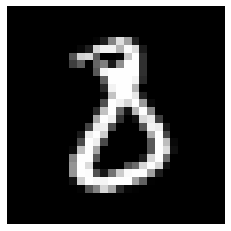

In [74]:
plt.subplot(1, 1, 1)
img = X_test[591].reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

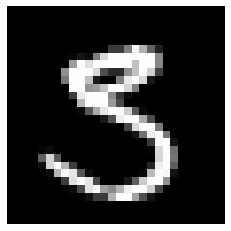

In [75]:
plt.subplot(1, 1, 1)
img = X_test[938].reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [76]:
np.nonzero((y_test == 4) & (y_pred == 9))

(array([ 115,  447,  707,  740,  881, 1178, 1242, 1422, 1778, 1865, 2130,
        2447, 2771, 2901, 3405, 3490, 4017, 4194, 4860, 4911, 5936, 8061,
        8520, 8527, 9211]),)

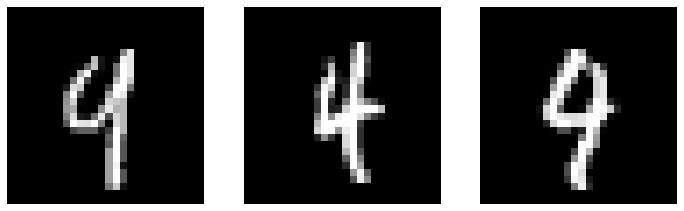

In [81]:
plt.figure(figsize=(12,12))

plt.subplot(1, 3, 1)
img = X_test[2771].reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.axis('off')
#plt.show()

plt.subplot(1, 3, 2)
img = X_test[2901].reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.axis('off')
#plt.show()

plt.subplot(1, 3, 3)
img = X_test[2447].reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [78]:
np.nonzero((y_test == 7) & (y_pred == 9))

(array([1522, 1721, 3333, 4199, 4578, 4690, 5600, 5620, 5655, 5714, 5835,
        5887, 5906]),)

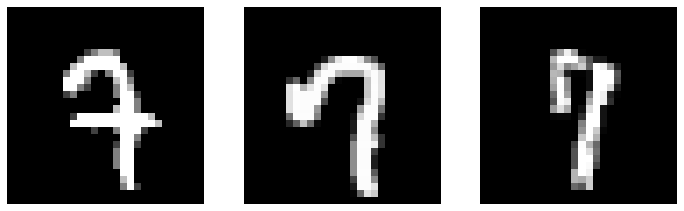

In [82]:
plt.figure(figsize=(12,12))

plt.subplot(1, 3, 1)
img = X_test[3333].reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.axis('off')
#plt.show()

plt.subplot(1, 3, 2)
img = X_test[5620].reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.axis('off')
#plt.show()

plt.subplot(1, 3, 3)
img = X_test[1721].reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
from skimage.transform import rotate
from skimage.filters import gaussian
from skimage.transform import warp, SimilarityTransform

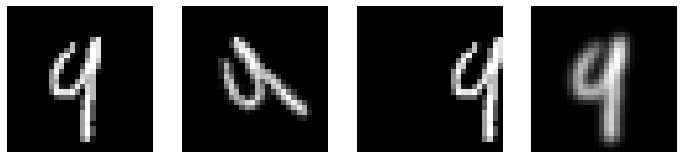

In [83]:
plt.figure(figsize=(12,12))

plt.subplot(1, 4, 1)
img = X_test[2771].reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
new_img = rotate(img, 50.0)
plt.imshow(new_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
transform = SimilarityTransform(translation=[-10, 0])
new_img = warp(img, transform)
plt.imshow(new_img, cmap='gray')
plt.axis('off')


plt.subplot(1, 4, 4)
new_img = gaussian(img.reshape((28, 28)), sigma=1.0)
plt.imshow(new_img, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
import random
from sklearn.model_selection import cross_val_score

rotates = [-15, -10, -5, 5, 10, 15]
shifts = [-3, -2, -1, 1, 2, 3]
gaus = [0.5, 1, 1.5]

In [87]:
import pandas as pd
X_train_pd = pd.read_csv('/mnist_train.csv')
y_train_pd = X_train_pd.pop('label')
X_test_pd = pd.read_csv('/mnist_test.csv')
y_test_pd = X_test_pd.pop('label')

In [88]:
vec_rotate = np.vectorize(rotate, signature='(n,m)->(n,m)', excluded=['angle'])
vec_gauss = np.vectorize(gaussian, signature='(n,m)->(n,m)', excluded=['sigma'])
vec_shift = np.vectorize(warp, signature='(n,m)->(n,m)', excluded=['inverse_map'])
new_train = X_train_pd.copy(deep=True)
transformer = np.apply_along_axis(np.reshape, 1, new_train, (28, 28))

In [ ]:
x_shift = random.choice(shifts)
y_shift = random.choice(shifts)
sigma = random.choice(gaus)
cv = kfold(X_train_pd.shape[0]*4, 3)
for angle in rotates:
    X_rotate = vec_rotate(transformer, angle=angle).reshape((transformer.shape[0], 784))
    X_shift =  vec_shift(transformer, inverse_map=SimilarityTransform(translation=(x_shift, y_shift))).reshape((transformer.shape[0], 784))
    X_gaus = vec_gauss(transformer, sigma=sigma).reshape((transformer.shape[0], 784))
    
    X_train_aug = np.concatenate((new_train.values, X_rotate, X_shift, X_gaus), axis=0)
    y_train_aug =  np.concatenate((y_train_pd.values, y_train_pd.values, y_train_pd.values, y_train_pd.values), axis=0)

    res = knn_cross_val_score(X_train_aug, y_train_aug, [4], 'accuracy', cv = cv, strategy='brute', metric='cosine', weights=True)
    print(f'angle = {angle}, x_sh = {x_shift}, y_sh = {y_shift}, sigma = {sigma}')
    print(res)

angle = -15, x_sh = 2, y_sh = 3, sigma = 0.5
{3: array([0.9872625, 0.968025 , 0.98365  ])}
angle = -10, x_sh = 2, y_sh = 3, sigma = 0.5
{3: array([0.9915375, 0.9748875, 0.9884   ])}
angle = -5, x_sh = 2, y_sh = 3, sigma = 0.5
{3: array([0.99435  , 0.9813625, 0.9927625])}
angle = 5, x_sh = 2, y_sh = 3, sigma = 0.5
{3: array([0.99425  , 0.981325 , 0.9927875])}
angle = 10, x_sh = 2, y_sh = 3, sigma = 0.5
{3: array([0.9914375, 0.974875 , 0.9889   ])}
angle = 15, x_sh = 2, y_sh = 3, sigma = 0.5
{3: array([0.9870875, 0.9673375, 0.9846   ])}


In [ ]:
angle = -5
sigma = random.choice(gaus)
cv = kfold(X_train_pd.shape[0]*4, 3)
for x_shift in range(-3, 4):
    if x_shift == 0:
        continue
    y_shift = random.choice(shifts)
    shifts.remove(y_shift)
    X_rotate = vec_rotate(transformer, angle=angle).reshape((transformer.shape[0], 784))
    X_shift =  vec_shift(transformer, inverse_map=SimilarityTransform(translation=(x_shift, y_shift))).reshape((transformer.shape[0], 784))
    X_gaus = vec_gauss(transformer, sigma=sigma).reshape((transformer.shape[0], 784))
    
    X_train_aug = np.concatenate((new_train.values, X_rotate, X_shift, X_gaus), axis=0)
    y_train_aug =  np.concatenate((y_train_pd.values, y_train_pd.values, y_train_pd.values, y_train_pd.values), axis=0)

    res = knn_cross_val_score(X_train_aug, y_train_aug, [4], 'accuracy', cv = cv, strategy='brute', metric='cosine', weights=True)
    print(f'angle = {angle}, x_sh = {x_shift}, y_sh = {y_shift}, sigma = {sigma}')
    print(res)

angle = -5, x_sh = -3, y_sh = -3, sigma = 1
{3: array([0.9950375, 0.9817625, 0.990275 ])}
angle = -5, x_sh = -2, y_sh = 3, sigma = 1
{3: array([0.995025 , 0.981525 , 0.9904375])}
angle = -5, x_sh = -1, y_sh = 1, sigma = 1
{3: array([0.995225, 0.98865 , 0.991725])}
angle = -5, x_sh = 1, y_sh = -1, sigma = 1
{3: array([0.99535  , 0.9897875, 0.992425 ])}
angle = -5, x_sh = 2, y_sh = -2, sigma = 1
{3: array([0.9950375, 0.9817625, 0.990425 ])}
angle = -5, x_sh = 3, y_sh = 2, sigma = 1
{3: array([0.9950375, 0.9815875, 0.9903125])}


In [ ]:
angle = -5
y_shift = -1
x_shift = 1
cv = kfold(X_train_pd.shape[0]*4, 3)
for sigma in [0.5, 1.5]:
    X_rotate = vec_rotate(transformer, angle=angle).reshape((transformer.shape[0], 784))
    X_shift =  vec_shift(transformer, inverse_map=SimilarityTransform(translation=(x_shift, y_shift))).reshape((transformer.shape[0], 784))
    X_gaus = vec_gauss(transformer, sigma=sigma).reshape((transformer.shape[0], 784))
    
    X_train_aug = np.concatenate((new_train.values, X_rotate, X_shift, X_gaus), axis=0)
    y_train_aug =  np.concatenate((y_train_pd.values, y_train_pd.values, y_train_pd.values, y_train_pd.values), axis=0)

    res = knn_cross_val_score(X_train_aug, y_train_aug, [4], 'accuracy', cv = cv, strategy='brute', metric='cosine', weights=True)
    print(f'angle = {angle}, x_sh = {x_shift}, y_sh = {y_shift}, sigma = {sigma}')
    print(res)

angle = -5, x_sh = 1, y_sh = -1, sigma = 0.5
{3: array([0.9948375, 0.98875  , 0.9948   ])}


In [89]:
angle = -5
y_shift = -1
x_shift = 1
sigma = 0.5
X_rotate = vec_rotate(transformer, angle=angle).reshape((transformer.shape[0], 784))
X_shift =  vec_shift(transformer, inverse_map=SimilarityTransform(translation=(x_shift, y_shift))).reshape((transformer.shape[0], 784))
X_gaus = vec_gauss(transformer, sigma=sigma).reshape((transformer.shape[0], 784))
    
X_train_aug = np.concatenate((new_train.values, X_rotate, X_shift, X_gaus), axis=0)
y_train_aug =  np.concatenate((y_train_pd.values, y_train_pd.values, y_train_pd.values, y_train_pd.values), axis=0)

In [90]:
cl = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
cl.fit(X_train_aug, y_train_aug)
y_pred = cl.predict(X_test_pd)
np.count_nonzero(y_pred == y_test_pd) / len(y_pred)

0.9768

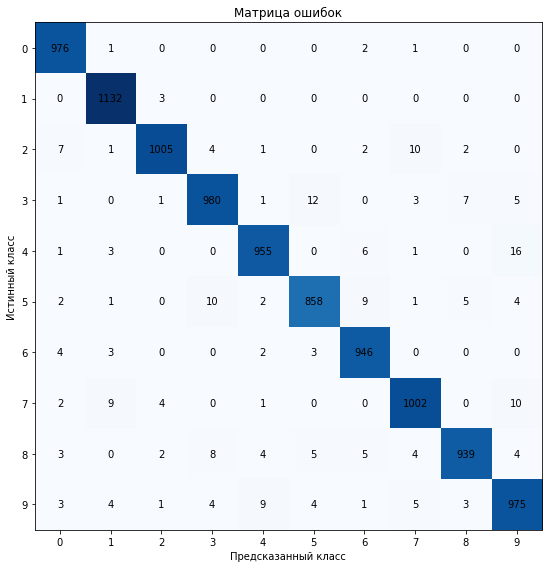

In [91]:
y_test_np = y_test_pd.to_numpy()
build_conf_mat(y_pred, y_test_np)

In [31]:
new_test = X_test_pd.copy(deep=True)
transformer = np.apply_along_axis(np.reshape, 1, new_test, (28, 28))

In [93]:
def get_pred_aug(angle=-5, x_shift=1, y_shift=-1, sigma=0.5):
    X_rotate = vec_rotate(transformer, angle=angle).reshape((transformer.shape[0], 784))
    X_shift =  vec_shift(transformer, inverse_map=SimilarityTransform(translation=(x_shift, y_shift))).reshape((transformer.shape[0], 784))
    X_gaus = vec_gauss(transformer, sigma=sigma).reshape((transformer.shape[0], 784))
    
    cl = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
    cl.fit(X_train_pd.values, y_train_pd.values)
    
    y_pred_norm = cl.predict(new_test.values)
    y_pred_rotate = cl.predict(X_rotate)
    y_pred_shift = cl.predict(X_shift)
    y_pred_gaus = cl.predict(X_gaus)
    
    y_pred_norm = np.vstack((y_pred_norm, y_pred_rotate, y_pred_shift, y_pred_gaus))
    y_pred_norm = y_pred_norm.astype('int')
    classes = np.zeros((len(y_pred_gaus), 10))
    y_pred = np.zeros(len(y_pred_gaus))
    for j in range(classes.shape[0]):
        for i in range(4):
            classes[j][y_pred_norm[i, j]] += 1
        y_pred[j] = np.argmax(classes[j])
  
    res = np.count_nonzero(y_pred == y_test_pd) / len(y_pred)
    return (res, y_pred)

In [48]:
res1 = get_pred_aug()
res1[0]

0.9746

In [51]:
res2 = get_pred_aug(angle=-5, x_shift =1, y_shift=-1, sigma=1.0)
res2[0]

0.9737

In [52]:
res3 = get_pred_aug(angle=-5, x_shift =2, y_shift=3, sigma=1.0)
res3[0]

0.9729

In [95]:
res4 = get_pred_aug(angle=5, x_shift =2, y_shift=3, sigma=0.5)
res4[0]

0.9746

In [54]:
res5 = get_pred_aug(angle=-5, x_shift=3, y_shift=3, sigma=1.0)
res5[0]

0.9726

In [55]:
res6 = get_pred_aug(angle=-5, x_shift =1, y_shift=-1, sigma=1.5)
res6[0]

0.9731

In [56]:
res7 = get_pred_aug(angle=5, x_shift =-2, y_shift=3, sigma=0.5)
res7[0]

0.9741

In [57]:
res8 = get_pred_aug(angle=5, x_shift=3, y_shift=2, sigma=0.5)
res8[0]

0.9746

In [58]:
res9 = get_pred_aug(angle=-10, x_shift =1, y_shift=-1, sigma=1.0)
res9[0]

0.9732

In [59]:
res10 = get_pred_aug(angle=10, x_shift=-1, y_shift=-1, sigma=1.0)
res10[0]

0.9715

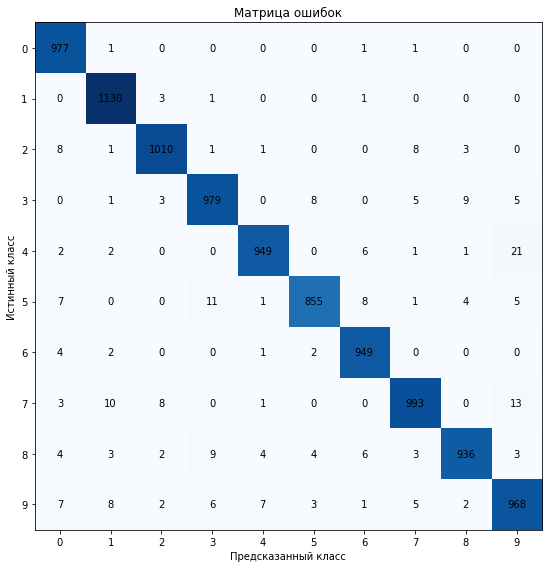

In [60]:
build_conf_mat(res4[1], y_test_np)